In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# para mejor visualización
import warnings
warnings.filterwarnings("ignore")

                 Model  Accuracy    Recall  F1-Score
0          Naive Bayes  0.625000  0.530342  0.525044
1  Regresion Logística  0.678571  0.522650  0.530507
2        Random Forest  0.625000  0.492521  0.458773
3    Gradient Boosting  0.571429  0.479701  0.464322
4                  SVM  0.696429  0.557692  0.565975
5  K-Nearest Neighbors  0.625000  0.536966  0.564511
6             AdaBoost  0.500000  0.314530  0.259992
7              XGBoost  0.678571  0.578632  0.585443


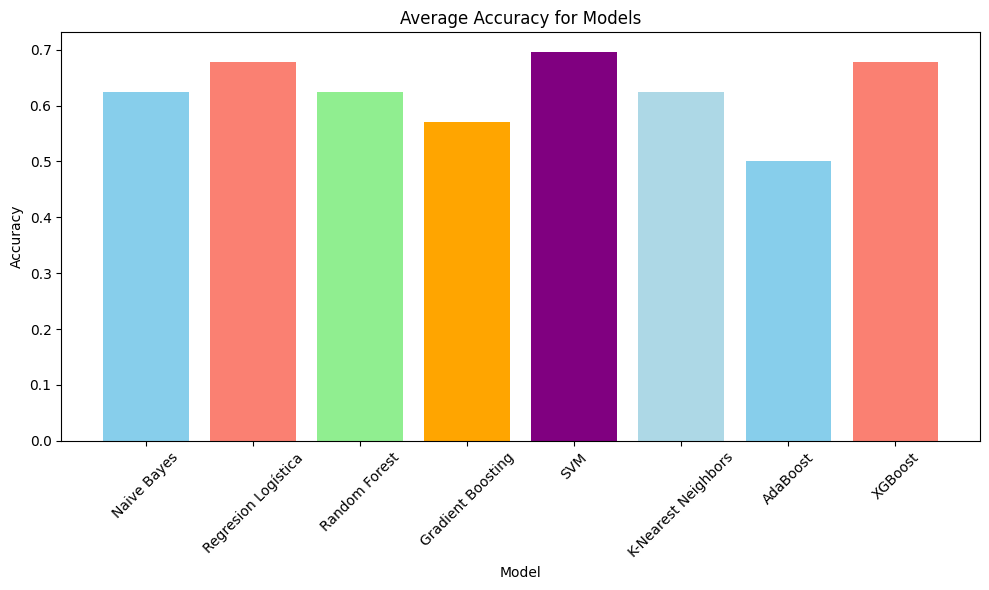

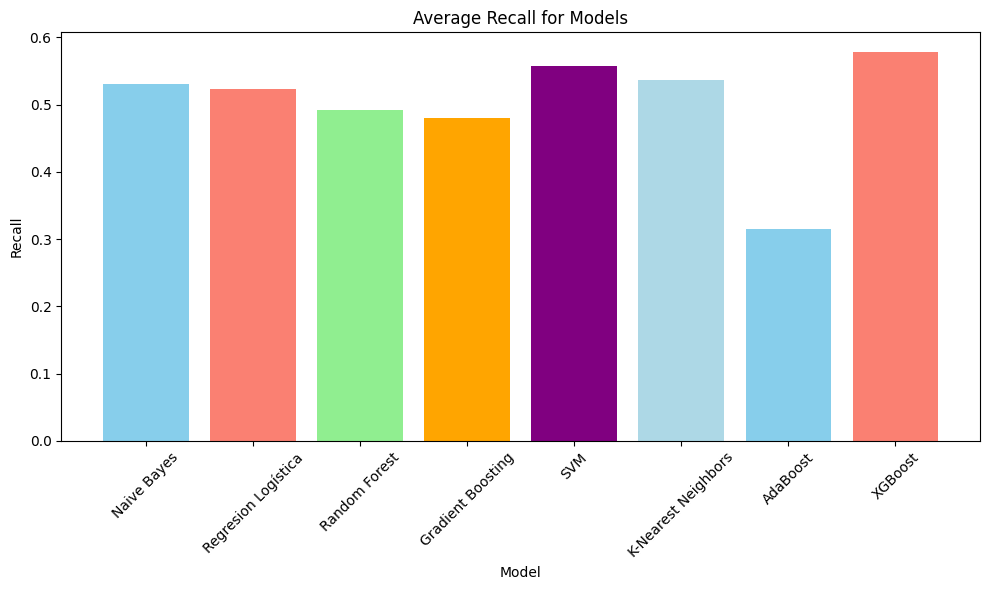

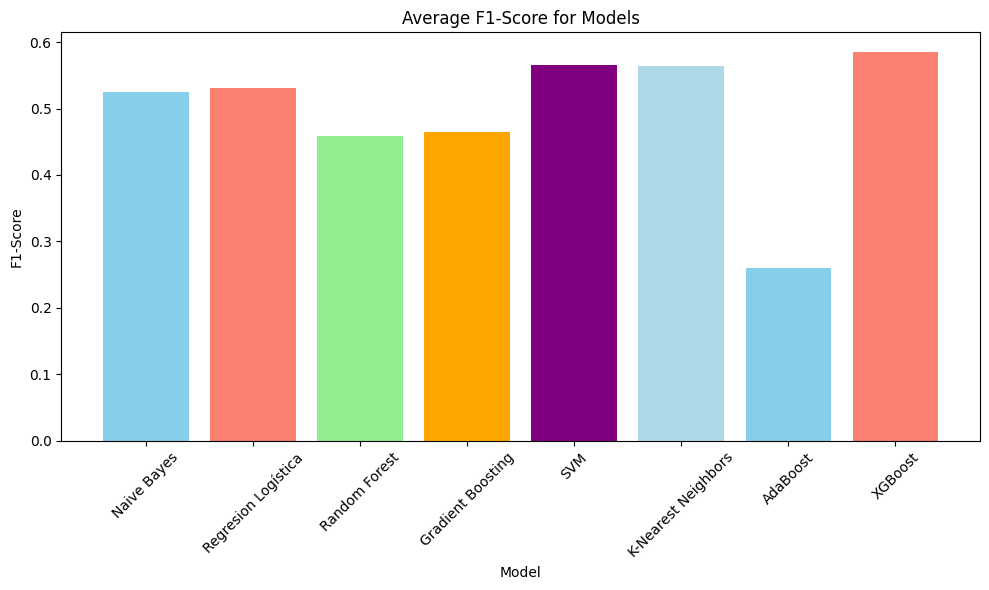

In [3]:
df = pd.read_csv(r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\textos_patologias_linea_de_administracion.csv', 
                 encoding='utf-8-sig', delimiter=';')

random = 81418
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['administracion'], random_state=81418)

X_train = train_df['textos']
y_train = train_df['administracion']
X_test = test_df['textos']
y_test = test_df['administracion']

# Vectorización de los textos usando TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Definir clasificadores con hiperparámetros
classifiers = {
    "Naive Bayes": MultinomialNB(alpha=0.1),
    "Regresion Logística": LogisticRegression(random_state=81418, max_iter=20),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=81418,max_depth=5),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.05, max_depth=10, random_state=81418),
    "SVM": SVC(C=1.0, kernel='linear', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "AdaBoost": AdaBoostClassifier(random_state=81418),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.2, max_depth=10, subsample=0.8, random_state=81418)
}


# Almacenar métricas de los clasificadores
results = {
    "Model": [],
    "Accuracy": [],
    "Recall": [],
    "F1-Score": []
}

# Entrenar y evaluar cada modelo
for name, clf in classifiers.items():
    # Entrenamiento
    clf.fit(X_train_tfidf, y_train)
    
    # Predicción en el conjunto de prueba
    y_pred = clf.predict(X_test_tfidf)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')  # 'macro' para múltiples clases
    f1 = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['f1-score'] for i in np.unique(y_test)])
    
    # Guardar métricas
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)

# Crear DataFrame para los resultados
results_df = pd.DataFrame(results)

# Guardar el DataFrame como archivo CSV
results_df.to_csv("model_metrics_no_cv.csv", index=False)

# Ver el DataFrame
print(results_df)

# Bar plot de métricas
for metric_name in ["Accuracy", "Recall", "F1-Score"]:
    plt.figure(figsize=(10, 6))

    # Crear bar plot
    plt.bar(results["Model"], results[metric_name], color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'lightblue'])

    plt.title(f"Average {metric_name} for Models")
    plt.ylabel(metric_name)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [4]:
new_row = {
    "Model": "Transformer BERT",
    "Accuracy": 0.375,
    "Recall": 0.22986,
    "F1-Score": 0.1851
}

new_row_df = pd.DataFrame([new_row])
combined_df = pd.concat([results_df, new_row_df], ignore_index=True)

In [5]:
new_row = {
    "Model": "Modelo en cascada",
    "Accuracy": 0.714285,
    "Recall": 0.656838,
    "F1-Score": 0.614566
}

new_row_df = pd.DataFrame([new_row])
combined_df = pd.concat([combined_df, new_row_df], ignore_index=True)

In [6]:
combined_df

,Model,Accuracy,Recall,F1-Score
0,Naive Bayes,0.625000,0.530342,0.525044
1,Regresion Logística,0.678571,0.522650,0.530507
2,Random Forest,0.625000,0.492521,0.458773
3,Gradient Boosting,0.571429,0.479701,0.464322
4,SVM,0.696429,0.557692,0.565975
5,K-Nearest Neighbors,0.625000,0.536966,0.564511
6,AdaBoost,0.500000,0.314530,0.259992
7,XGBoost,0.678571,0.578632,0.585443
8,Transformer BERT,0.375000,0.229860,0.185100
9,Modelo en cascada,0.714285,0.656838,0.614566


<Figure size 1000x600 with 0 Axes>

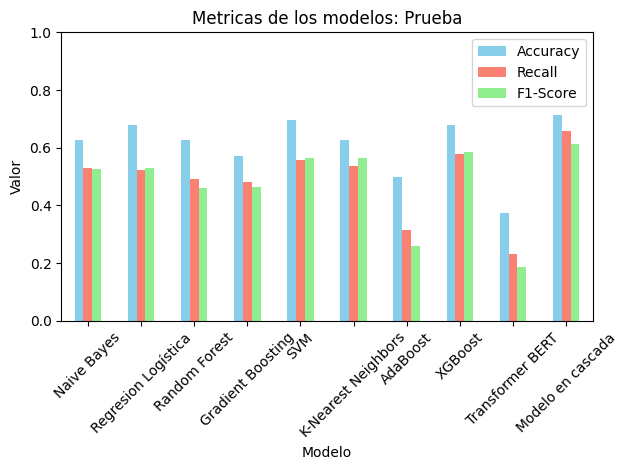

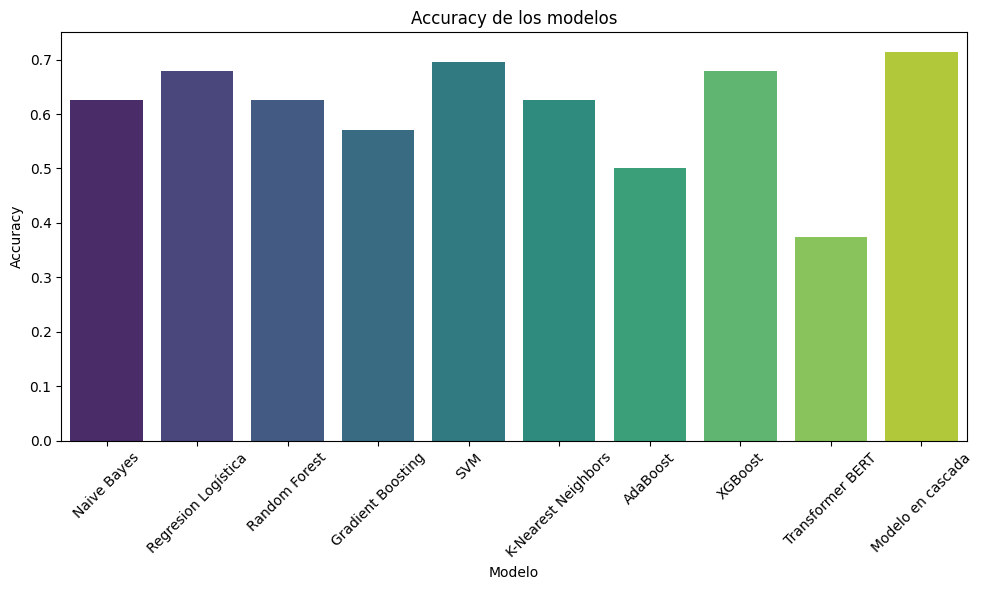

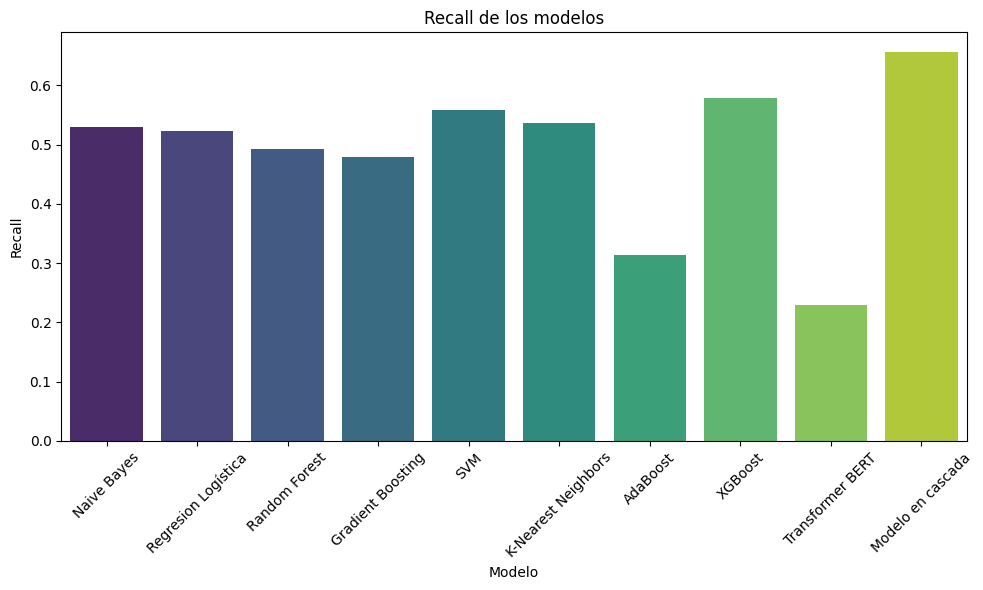

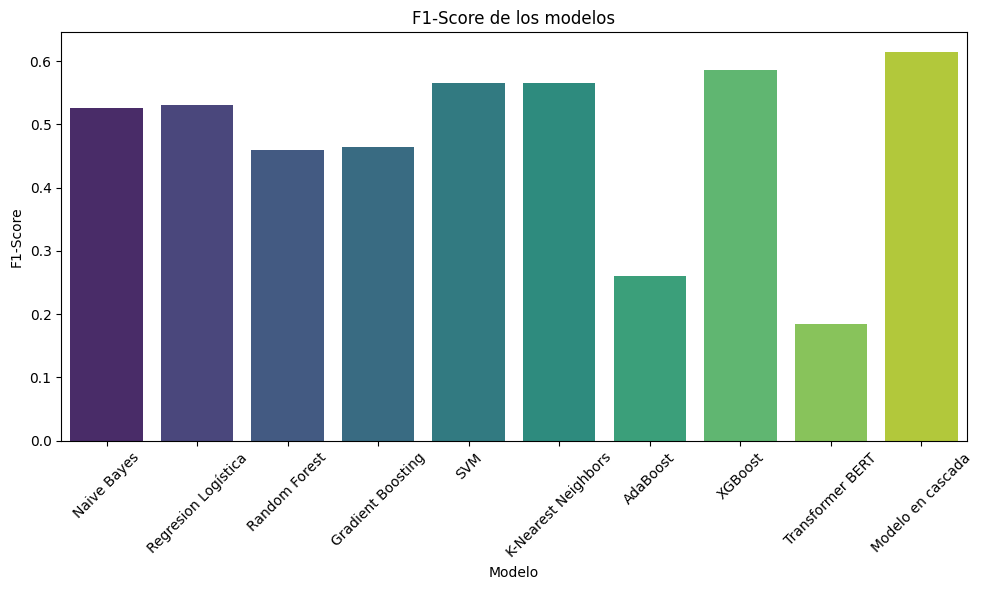

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que 'combined_df' tiene las columnas: 'Model', 'Accuracy', 'Recall', 'F1-Score'
# Si ya lo tienes, simplemente ejecuta este código para crear los gráficos.

# Bar plot conjunto de Accuracy, Recall, F1-Score
plt.figure(figsize=(10, 6))
combined_df.set_index("Model")[['Accuracy', 'Recall', 'F1-Score']].plot(kind="bar", color=['skyblue', 'salmon', 'lightgreen'])

plt.title("Metricas de los modelos: Prueba")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.ylim(0, 1)  # Métricas entre 0 y 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot individual para cada métrica
metrics = ['Accuracy', 'Recall', 'F1-Score']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=combined_df, palette='viridis')

    plt.title(f"{metric} de los modelos")
    plt.xlabel("Modelo")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
